<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">NESTING SUPPORT VECTOR MACHINTE FOR MUTI-CLASSIFICATION (NSVMS) - (thyroid Dataset)</h3>
    <h4 align="center">Masoud Mahanian 4003073535</h5>
</div>

## What is NSVMS?

Support vector machines (SVMS) were originally designed for binary classifications. As for multi-classifications, they are usually converted into binary ones, where unclassifiabl regions usually exist. To overcome this drawback, a novel method called Nesting Support Vector Machine (NSVMS) for multi-classification is presented in this paper. Our ideas are as follows: Firstly, construct the optimal hyperplanes based on One-against-One algorithm. Secondly, if there exist data points in the middle unclassifiable region, select them to construct optimal hyperplanes with the same hyperparameters. Thirdly, repeat the second step until there are no data points in the unclassifiable regions or the regions disappear. In order to examine the training accuracy and the generalization performance of the proposed algorithm, One-against-One algorithm, Fuzzy Least Square Support Vector Machine (FLS-SVM) and the proposed algorithm are applied to two UCI datasets. The results show that the training accuracy of the proposed algorithm is higher than the others, and its generalization performance is also comparable with them.

In [1]:
# import packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load Dataset
data = pd.read_csv('thyroid.csv')
data.head()

,patient_id,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,class
0,1,41.0,0.0,0,0,0,0,0,0,0,...,1,2.5,1,125.0,1,1.14,1,109.0,0,negative
1,2,23.0,0.0,0,0,0,0,0,0,0,...,1,2.0,1,102.0,0,NaN,0,NaN,0,negative
2,3,46.0,1.0,0,0,0,0,0,0,0,...,0,NaN,1,109.0,1,0.91,1,120.0,0,negative
3,4,70.0,0.0,1,0,0,0,0,0,0,...,1,1.9,1,175.0,0,NaN,0,NaN,0,replacement therapy
4,5,70.0,0.0,0,0,0,0,0,0,0,...,1,1.2,1,61.0,1,0.87,1,70.0,0,negative


## About Dataset

In [3]:
data.columns

Index(['patient_id', 'age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'class'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   patient_id                 2800 non-null   int64  
 1   age                        2799 non-null   float64
 2   sex                        2690 non-null   float64
 3   on thyroxine               2800 non-null   int64  
 4   query on thyroxine         2800 non-null   int64  
 5   on antithyroid medication  2800 non-null   int64  
 6   sick                       2800 non-null   int64  
 7   pregnant                   2800 non-null   int64  
 8   thyroid surgery            2800 non-null   int64  
 9   I131 treatment             2800 non-null   int64  
 10  query hypothyroid          2800 non-null   int64  
 11  query hyperthyroid         2800 non-null   int64  
 12  lithium                    2800 non-null   int64  
 13  goitre                     2800 non-null   int64

In [5]:
data.isnull().sum()

patient_id                     0
age                            1
sex                          110
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          284
T3 measured                    0
T3                           585
TT4 measured                   0
TT4                          184
T4U measured                   0
T4U                          297
FTI measured                   0
FTI                          295
TBG measured                   0
class                          0
dtype: int64

## Clear Data

drop unused columns and nan colums

In [6]:
data1 = data.dropna().drop(labels=['patient_id','TSH measured','T3 measured','TT4 measured','T4U measured',
                                  'FTI measured','TBG measured'],axis=1)
data1.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,class
0,41.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1.30,2.5,125.0,1.14,109.0,negative
4,70.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.72,1.2,61.0,0.87,70.0,negative
7,80.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.20,0.6,80.0,0.70,115.0,negative
8,66.0,0.0,0,0,0,0,0,0,0,0,...,0,1,0,0,0.60,2.2,123.0,0.93,132.0,negative
9,68.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,2.40,1.6,83.0,0.89,93.0,negative


In [7]:
X = data1.iloc[:, :-1].values
y = data1.iloc[:, -1].values

## preprocessing Data and LabelEncoder

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print ("output(class lable is) :",list(le.classes_))

output(class lable is) : ['negative', 'overreplacement', 'replacement therapy', 'underreplacement']


In [9]:
X.shape

(1947, 21)

## use correlation for more information

In [10]:
df = pd.DataFrame(np.concatenate((X, y.reshape((-1,1))), axis=1),columns=data1.columns)

Text(0.5, 1.0, 'Correlation ')

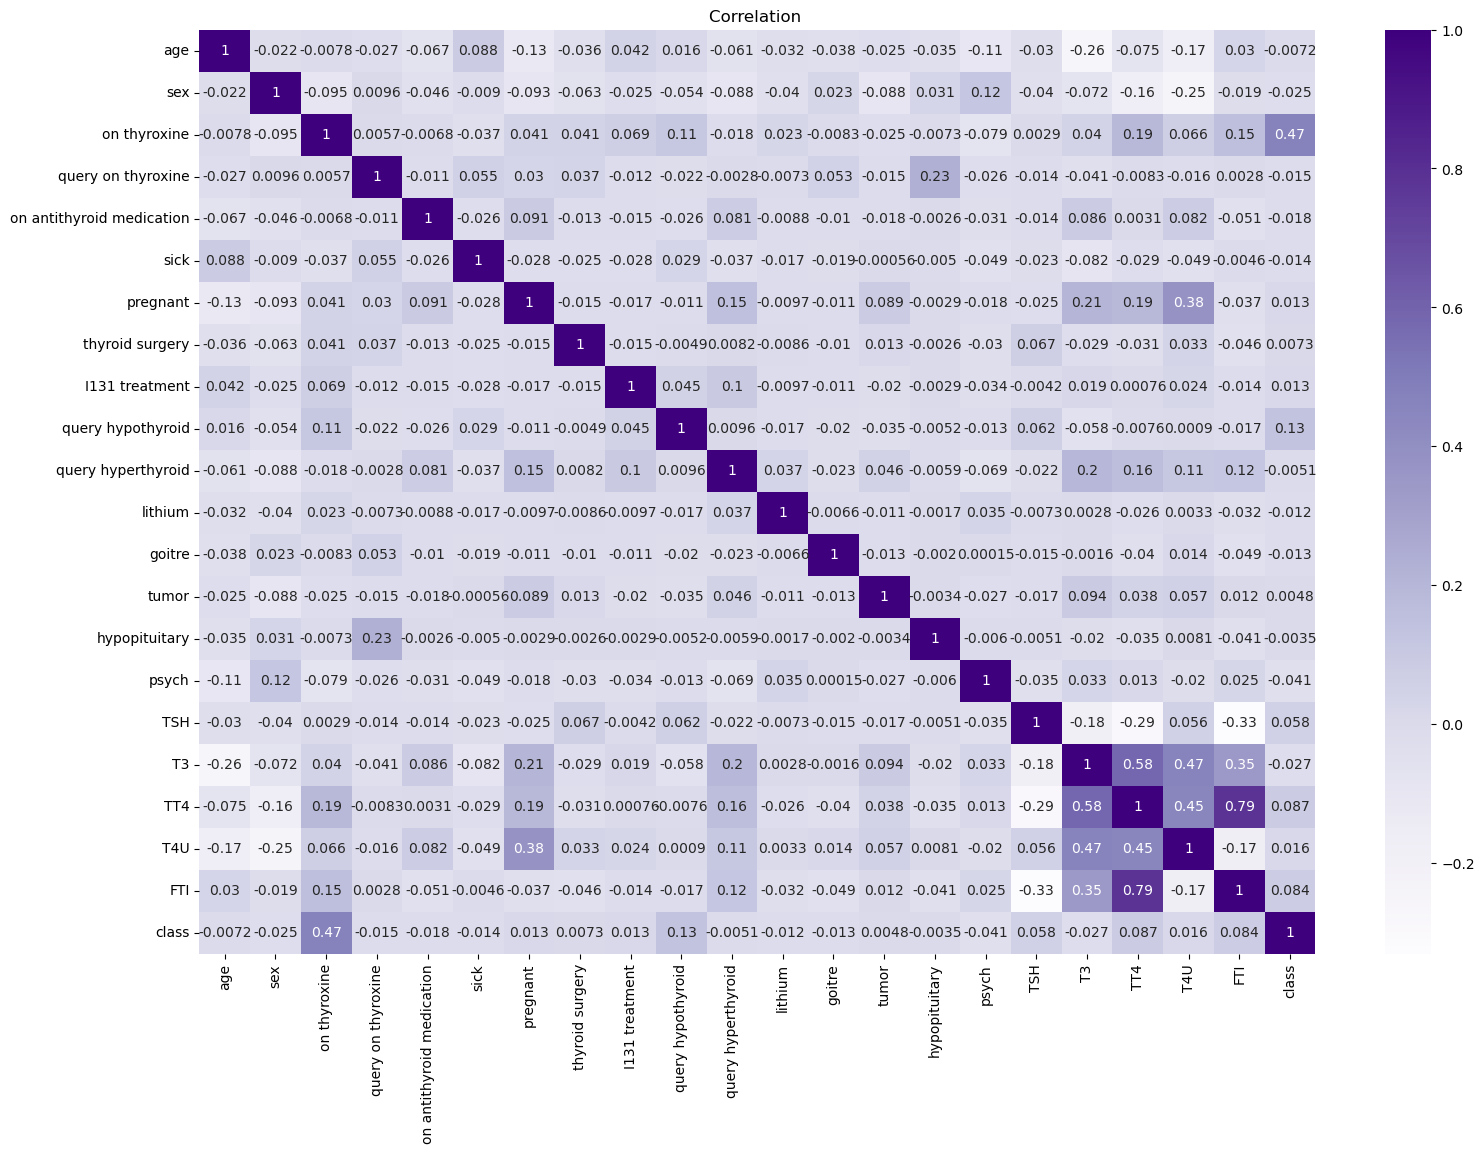

In [11]:
corr=df.corr()
fig = plt.figure(figsize=(18,12))
r = sns.heatmap(corr, cmap='Purples' , annot=True)
r.set_title("Correlation ")

In [12]:
corr.sort_values(by=["class"],ascending=False).iloc[0].sort_values(ascending=False)

class                        1.000000
on thyroxine                 0.474753
query hypothyroid            0.132113
TT4                          0.086940
FTI                          0.083970
TSH                          0.057556
T4U                          0.016026
pregnant                     0.013034
I131 treatment               0.013034
thyroid surgery              0.007255
tumor                        0.004809
hypopituitary               -0.003466
query hyperthyroid          -0.005120
age                         -0.007244
lithium                     -0.011526
goitre                      -0.013474
sick                        -0.013802
query on thyroxine          -0.014771
on antithyroid medication   -0.017790
sex                         -0.025123
T3                          -0.026703
psych                       -0.040733
Name: class, dtype: float64

## Standard
Standardize features by removing the mean and scaling to unit variance.

In [13]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

## training and testing

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [14]:
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=7)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1927, 21)
(1927,)
(20, 21)
(20,)


# Simple SVM implementation

In [15]:
from sklearn.svm import SVC
svclassifier = SVC() #note at the first Kernel is not important we will add Kernel

In [16]:
svclassifier.fit(X_train, y_train)

SVC()

In [17]:
y_pred = svclassifier.predict(X_test)

# metric

In [18]:
from sklearn.metrics import accuracy_score

on test data

In [19]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the SVM Model in test Data: ",accuracy)

Accuracy of the SVM Model in test Data:  100.0


In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[19  0]
 [ 0  1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



on train data

In [21]:
accuracy = accuracy_score(y_train, svclassifier.predict(X_train)) * 100
print("Accuracy of the SVM Model in train Data: ",accuracy)

Accuracy of the SVM Model in train Data:  97.97612869745718


In [22]:
print(confusion_matrix(y_train, svclassifier.predict(X_train)))
print(classification_report(y_train, svclassifier.predict(X_train)))

[[1876    0    0    0]
 [   4   12    0    0]
 [  10    2    0    0]
 [  23    0    0    0]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1876
           1       0.86      0.75      0.80        16
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        23

    accuracy                           0.98      1927
   macro avg       0.46      0.44      0.45      1927
weighted avg       0.96      0.98      0.97      1927



Note: The model is a bad model.

Because the model could not be trained well due to the following reasons:

1: Imbalance in the number of classes

2: Lack of correct recognition in the training phase

So, we will reach a more suitable model by implementing the article

# implementing the article

In [23]:
from sklearn.multiclass import OneVsOneClassifier

In [24]:
model =SVC(kernel='linear')

## Firstly
construct C(C−1)/2 hyperplanes in the feature space based on One-against-One approach

In [25]:
ovo = OneVsOneClassifier(model)

In the case of “one-vs-one” SVC and NuSVC, the layout of the attributes is a little more involved. In the case of a linear kernel, the attributes coef_ and intercept_ have the shape (n_classes * (n_classes - 1) / 2, n_features) and (n_classes * (n_classes - 1) / 2) respectively. This is similar to the layout for LinearSVC described above, with each row now corresponding to a binary classifier. The order for classes 0 to n is “0 vs 1”, “0 vs 2” , … “0 vs n”, “1 vs 2”, “1 vs 3”, “1 vs n”, . . . “n-1 vs n”.

In [26]:
ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC(kernel='linear'))

## Secondly
select the data points in the middle unclassifiable region

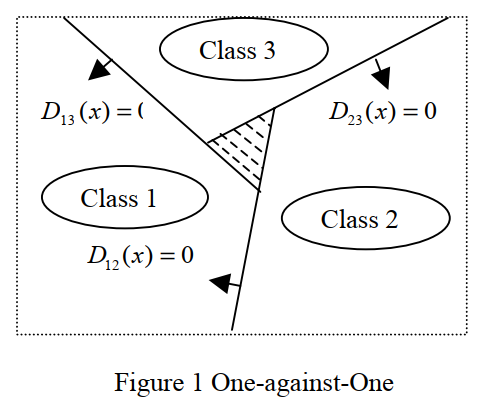

In [27]:
def missed_class(input_y,input_x,model_):
    input_y = np.asarray(input_y)
    misclassified = np.where(input_y != model_(input_x))# according to the algoritm find unclassifiable
    return misclassified


In [28]:
misclassified = missed_class(y_train,X_train,ovo.predict)
misclassified

(array([  86,  200,  226,  235,  393,  422,  423,  501,  508,  557,  655,
         663,  729,  748,  763,  787,  907,  946, 1054, 1146, 1181, 1292,
        1347, 1441, 1455, 1461, 1487, 1504, 1601, 1707, 1725, 1775],
       dtype=int64),)

In [29]:
# y_train = np.asarray(y_train)
# misclassified = np.where(y_train != ovo.predict(X_train))# according to the algoritm find unclassifiable
# misclassified

## Thirdly
use the data points in the unclassifiable region alone to construct hyperplanes with the same hyperparameters.

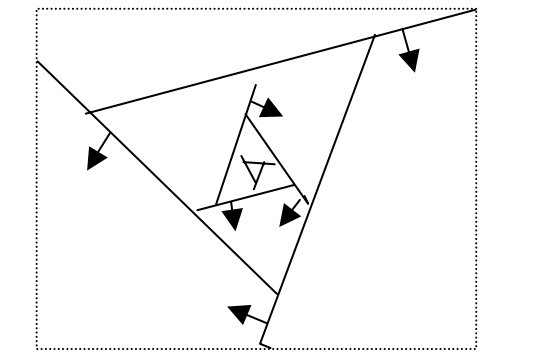

In [30]:
def new_X_and_Y_(X_old,y_old,misclassified_):
    X_new=[]
    y_new=[]
    for index in misclassified[0]:
        x_add = X_old[index].tolist()
    #     print(index,"\n",x_add)
        X_new.append(x_add)
        y_add = y_old[index].tolist()
        y_new.append(y_add)
    X_new = np.array(X_new)
    y_new = np.array(y_new).reshape(-1,)
    return X_new,y_new

In [31]:
[X_train_new,y_train_new]=new_X_and_Y_(X_train,y_train,misclassified)

In [32]:
y_train_new.shape

(32,)

In [33]:
# X_new=[]
# y_new=[]
# for index in misclassified[0]:
#     x_add = X_train[index].tolist()
# #     print(index,"\n",x_add)
#     X_new.append(x_add)
#     y_add =y_train[index].tolist()
#     y_new.append(y_add)
# X_new = np.array(X_new)
# y_new = np.array(y_new)
# y_new.reshape(1,-1)

In [34]:
ovo1 = OneVsOneClassifier(model)
ovo1.fit(X_train_new, y_train_new)

OneVsOneClassifier(estimator=SVC(kernel='linear'))

In [35]:
misclassified = missed_class(y_train_new,X_train_new,ovo1.predict)
misclassified

(array([25], dtype=int64),)

In [36]:
print(confusion_matrix(y_train_new, ovo1.predict(X_train_new)))
print(classification_report(y_train_new, ovo1.predict(X_train_new)))

[[ 2  0  0  0]
 [ 0  3  1  0]
 [ 0  0  7  0]
 [ 0  0  0 19]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      0.75      0.86         4
           2       0.88      1.00      0.93         7
           3       1.00      1.00      1.00        19

    accuracy                           0.97        32
   macro avg       0.97      0.94      0.95        32
weighted avg       0.97      0.97      0.97        32



## more ML classifier

so almoste it done but We run more ML algorithm for better comparison

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression()

In [39]:
y_pred = logreg.predict(X)

In [40]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[1892    0    0    3]
 [   3   14    0    0]
 [   7    1    4    0]
 [  15    0    0    8]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1895
           1       0.93      0.82      0.87        17
           2       1.00      0.33      0.50        12
           3       0.73      0.35      0.47        23

    accuracy                           0.99      1947
   macro avg       0.91      0.63      0.71      1947
weighted avg       0.98      0.99      0.98      1947



### KNN in python

> Pros:

* No assumptions about data
* Simple algorithm — easy to understand
* Can be used for classification and regression

> Cons:

* High memory requirement — All of the training data must be present in memory in order to calculate the closest K neighbors
* Sensitive to irrelevant features
* Sensitive to the scale of the data since we’re computing the distance to the closest K points

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier()
#n_neighbors = 5
knn.fit(X, y)

KNeighborsClassifier()

In [43]:
y_pred = knn.predict(X)

In [44]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[1894    0    0    1]
 [   4   13    0    0]
 [   7    3    2    0]
 [  15    0    0    8]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1895
           1       0.81      0.76      0.79        17
           2       1.00      0.17      0.29        12
           3       0.89      0.35      0.50        23

    accuracy                           0.98      1947
   macro avg       0.92      0.57      0.64      1947
weighted avg       0.98      0.98      0.98      1947



#### Optimal value of K

In [45]:
error_rate = []
# Might take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X,y)
    pred_i = knn.predict(X)
    error_rate.append(np.mean(pred_i != y))

Text(0, 0.5, 'Error Rate')

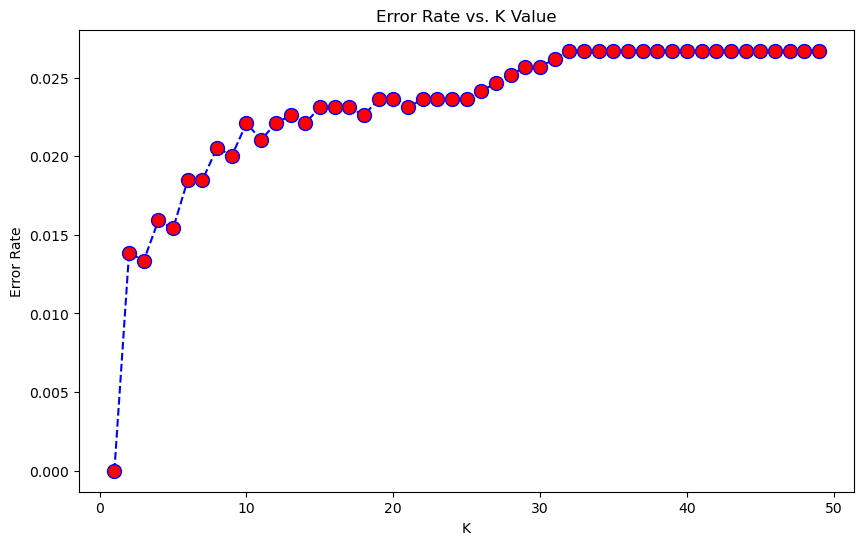

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [47]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

#### for best K:

In [48]:
y_pred = knn.predict(X)
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[1894    0    0    1]
 [   3   14    0    0]
 [   4    2    6    0]
 [  16    0    0    7]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1895
           1       0.88      0.82      0.85        17
           2       1.00      0.50      0.67        12
           3       0.88      0.30      0.45        23

    accuracy                           0.99      1947
   macro avg       0.93      0.66      0.74      1947
weighted avg       0.99      0.99      0.98      1947



### Naive Bayes

In this, using Bayes theorem we can find the probability of A, given that B occurred.

> A is the hypothesis and B is the evidence.

> P(B|A) is the probability of B given that A is True.

> P(A) and P(B) is the independent probabilities of A and B.

In [49]:
from sklearn.naive_bayes import GaussianNB
classifierBayes = GaussianNB()
classifierBayes.fit(X, y)

GaussianNB()

In [50]:
y_pred = classifierBayes.predict(X)

In [51]:
print(confusion_matrix(y,y_pred))
print(classification_report(y,y_pred))

[[1772   18   62   43]
 [   0   15    2    0]
 [   0    4    8    0]
 [   0    0    0   23]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1895
           1       0.41      0.88      0.56        17
           2       0.11      0.67      0.19        12
           3       0.35      1.00      0.52        23

    accuracy                           0.93      1947
   macro avg       0.47      0.87      0.56      1947
weighted avg       0.98      0.93      0.95      1947



### Decision Tree Classification

* Node: Each object in a tree. Nodes contain subsets of data, and excluding leaf nodes, a question splits the subset.
* Parent node: The question that makes a data split.
* Child node: Resulting node. It also can be a parent for its children.
* Leaf node: Final node with no further questions. Only a subset of the data representing answers to preceding questions.
* Branch: Unique line of the questions with answers that flow to a leaf node.
* Root: The top node. 

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.250, random_state = 0)
# We have rewritten this to avoid overfitting

In [53]:
from sklearn.tree import DecisionTreeClassifier

classifierTree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
y_pred = classifierTree.predict(X_test)

In [55]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[474   1   0   1]
 [  0   5   0   0]
 [  0   2   2   0]
 [  0   0   0   2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       0.62      1.00      0.77         5
           2       1.00      0.50      0.67         4
           3       0.67      1.00      0.80         2

    accuracy                           0.99       487
   macro avg       0.82      0.87      0.81       487
weighted avg       0.99      0.99      0.99       487

